# Model for Tumor classification

Explain project goals

## Import libraries

In [1]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def load_and_preprocess_images(image_dir, labels, img_size=(224, 224)):
    images = []
    processed_labels = []
    for label in labels:
        label_dir = os.path.join(image_dir, label)
        for image_file in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_file)
            image = cv2.imread(image_path)
            if image is not None:
                image = cv2.resize(image, img_size)
                images.append(image)
                processed_labels.append(labels[label])
    images = np.array(images) / 255.0
    processed_labels = to_categorical(np.array(processed_labels))
    return images, processed_labels

# Example usage
image_dir = 'combined/train'
labels = {'tumor': 0, 'no_tumor': 1}
images, processed_labels = load_and_preprocess_images(image_dir, labels)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, processed_labels, test_size=0.2, random_state=42)


In [2]:
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

input_shape = (224, 224, 3)
num_classes = 2
model = create_cnn_model(input_shape, num_classes)
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)

# Save the model
model.save('brain_tumor_cnn_model.h5')


/Users/kayen/.pyenv/versions/3.12.3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,245,186 (84.86 MB)

 Trainable params: 22,245,186 (84.86 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 97s 689ms/step - accuracy: 0.7103 - loss: 0.8200 - val_accuracy: 0.8968 - val_loss: 0.2843
Epoch 2/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 91s 650ms/step - accuracy: 0.9052 - loss: 0.2432 - val_accuracy: 0.9357 - val_loss: 0.1795
Epoch 3/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 91s 652ms/step - accuracy: 0.9550 - loss: 0.1281 - val_accuracy: 0.9376 - val_loss: 0.1803
Epoch 4/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 89s 637ms/step - accuracy: 0.9727 - loss: 0.0805 - val_accuracy: 0.9620 - val_loss: 0.1472
Epoch 5/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 89s 642ms/step - accuracy: 0.9840 - loss: 0.0457 - val_accuracy: 0.9729 - val_loss: 0.1388
Epoch 6/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 89s 637ms/step - accuracy: 0.9900 - loss: 0.0314 - val_accuracy: 0.9674 - val_loss: 0.1230
Epoch 7/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 91s 652ms/step - accuracy: 0.9949 - loss: 0.0180 - val_accuracy: 0.9719 - val_loss: 0.1380
Epoch 8/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 90s 649ms/step - accuracy: 0.9964 - loss: 0

### Count class

In [4]:
def count_images_in_categories(image_dir, labels):
    image_counts = {label: 0 for label in labels}
    
    for label in labels:
        label_dir = os.path.join(image_dir, label)
        image_counts[label] = len([file for file in os.listdir(label_dir) if os.path.isfile(os.path.join(label_dir, file))])
    
    return image_counts

# Example usage
image_dir = 'combined/train'
labels = {'tumor': 0, 'no_tumor': 1}
image_counts = count_images_in_categories(image_dir, labels)

# Print the counts of images in each category
print(f"Number of 'tumor' images: {image_counts['tumor']}")
print(f"Number of 'no_tumor' images: {image_counts['no_tumor']}")


Number of 'tumor' images: 3872
Number of 'no_tumor' images: 1650


### Using class_weight

In [11]:
def load_and_preprocess_images(image_dir, labels, img_size=(224, 224)):
    images = []
    processed_labels = []
    for label in labels:
        label_dir = os.path.join(image_dir, label)
        for image_file in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_file)
            image = cv2.imread(image_path)
            if image is not None:
                image = cv2.resize(image, img_size)
                images.append(image)
                processed_labels.append(labels[label])
    images = np.array(images) / 255.0
    processed_labels = np.array(processed_labels)
    return images, processed_labels

# Example usage
image_dir = 'combined/train'
labels = {'tumor': 0, 'no_tumor': 1}
images, processed_labels = load_and_preprocess_images(image_dir, labels)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, processed_labels, test_size=0.2, random_state=42)

# Calculate class weights using the original integer labels
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

# Convert class_weights to a dictionary
class_weights_dict = dict(enumerate(class_weights))

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')  # Assuming 2 classes: tumor and no_tumor
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Convert labels to categorical
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_val)

# Train the model with class weights
model.fit(X_train, y_train_categorical, validation_data=(X_val, y_val_categorical), epochs=5, class_weight=class_weights_dict)


/Users/kayen/.pyenv/versions/3.12.3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 85s 602ms/step - accuracy: 0.7055 - loss: 1.0563 - val_accuracy: 0.9303 - val_loss: 0.1936
Epoch 2/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 80s 574ms/step - accuracy: 0.9616 - loss: 0.1249 - val_accuracy: 0.9321 - val_loss: 0.2088
Epoch 3/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 76s 543ms/step - accuracy: 0.9729 - loss: 0.0832 - val_accuracy: 0.9593 - val_loss: 0.1553
Epoch 4/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 78s 563ms/step - accuracy: 0.9912 - loss: 0.0304 - val_accuracy: 0.9457 - val_loss: 0.2153
Epoch 5/5
139/139 ━━━━━━━━━━━━━━━━━━━━ 78s 560ms/step - accuracy: 0.9656 - loss: 0.0882 - val_accuracy: 0.9584 - val_loss: 0.1878


### Print class weight after modeling

In [13]:
print(class_weights_dict)

{0: 0.7135702746365105, 1: 1.670574886535552}


## Add classweight

In [14]:
def load_and_preprocess_images(image_dir, labels, img_size=(224, 224)):
    images = []
    processed_labels = []
    for label in labels:
        label_dir = os.path.join(image_dir, label)
        for image_file in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_file)
            image = cv2.imread(image_path)
            if image is not None:
                image = cv2.resize(image, img_size)
                images.append(image)
                processed_labels.append(labels[label])
    images = np.array(images) / 255.0
    processed_labels = np.array(processed_labels)
    return images, processed_labels

# Example usage
image_dir = 'combined/train'
labels = {'tumor': 0, 'no_tumor': 1}
images, processed_labels = load_and_preprocess_images(image_dir, labels)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, processed_labels, test_size=0.2, random_state=42)

# Calculate class weights using the original integer labels
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)

# Convert class_weights to a dictionary
class_weights_dict = dict(enumerate(class_weights))

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Assuming 2 classes: tumor and no_tumor
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Convert labels to categorical
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_val)

# Train the model with class weights
model.fit(X_train, y_train_categorical, validation_data=(X_val, y_val_categorical), epochs=2, class_weight=class_weights_dict)

# Model evaluation
# Predict the labels for the validation set
y_val_pred = model.predict(X_val)

# Convert predictions and true labels to integer format
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val_categorical, axis=1)

# Generate classification report
report = classification_report(y_val_true_classes, y_val_pred_classes, target_names=['tumor', 'no_tumor'])
print(report)


/Users/kayen/.pyenv/versions/3.12.3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
139/139 ━━━━━━━━━━━━━━━━━━━━ 90s 638ms/step - accuracy: 0.6585 - loss: 1.0638 - val_accuracy: 0.9186 - val_loss: 0.2499
Epoch 2/2
139/139 ━━━━━━━━━━━━━━━━━━━━ 72s 518ms/step - accuracy: 0.9187 - loss: 0.2141 - val_accuracy: 0.9548 - val_loss: 0.1585
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step
              precision    recall  f1-score   support

       tumor       0.95      0.98      0.97       777
    no_tumor       0.96      0.89      0.92       328

    accuracy                           0.95      1105
   macro avg       0.96      0.94      0.94      1105
weighted avg       0.95      0.95      0.95      1105



### Confusion Matrix

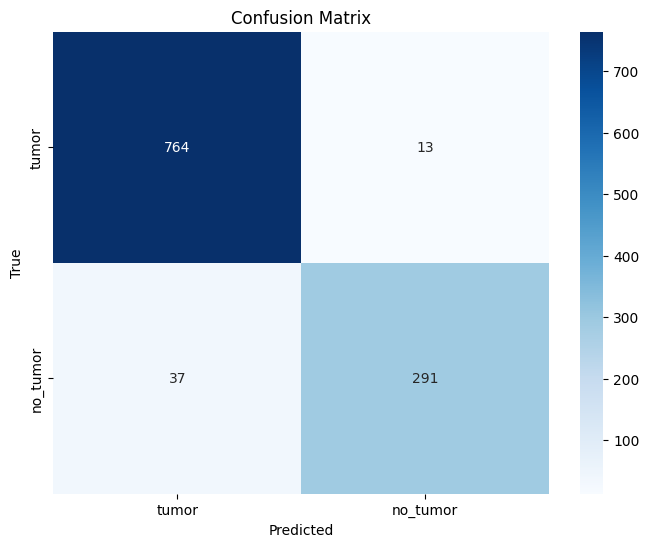

In [19]:
cm = confusion_matrix(y_val_true_classes, y_val_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['tumor', 'no_tumor'], yticklabels=['tumor', 'no_tumor'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Use augmented data

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Enable mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

# Function to load and preprocess images
def load_and_preprocess_images(image_dir, labels, img_size=(224, 224)):
    images = []
    processed_labels = []
    for label in labels:
        label_dir = os.path.join(image_dir, label)
        for image_file in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_file)
            image = cv2.imread(image_path)
            if image is not None:
                image = cv2.resize(image, img_size)
                images.append(image)
                processed_labels.append(labels[label])
    images = np.array(images) / 255.0
    processed_labels = to_categorical(np.array(processed_labels))
    return images, processed_labels

# Example usage
image_dir = 'combined/train'
labels = {'tumor': 0, 'no_tumor': 1, 'aug_no_tumor': 1}
images, processed_labels = load_and_preprocess_images(image_dir, labels)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, processed_labels, test_size=0.2, random_state=42)

# Function to create the VGG16-based model
def create_vgg_model(input_shape, num_classes):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Model parameters
input_shape = (224, 224, 3)
num_classes = 2  # Since there are two classes: tumor and no_tumor

# Create and summarize the VGG16-based model
model = create_vgg_model(input_shape, num_classes)
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)

# Plotting the training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Evaluate the model
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=['tumor', 'no_tumor']))
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print(conf_matrix)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    25,691,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         2,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,407,874 (154.14 MB)

 Trainable params: 25,693,186 (98.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
 44/189 ━━━━━━━━━━━━━━━━━━━━ 9:00 4s/step - accuracy: 0.4989 - loss: 4.7273

KeyboardInterrupt: 

/Users/kayen/.pyenv/versions/3.12.3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,245,186 (84.86 MB)

 Trainable params: 22,245,186 (84.86 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
189/189 ━━━━━━━━━━━━━━━━━━━━ 176s 923ms/step - accuracy: 0.7338 - loss: 0.6021 - val_accuracy: 0.9176 - val_loss: 0.1813
Epoch 2/2
189/189 ━━━━━━━━━━━━━━━━━━━━ 156s 826ms/step - accuracy: 0.9332 - loss: 0.1622 - val_accuracy: 0.9581 - val_loss: 0.1188


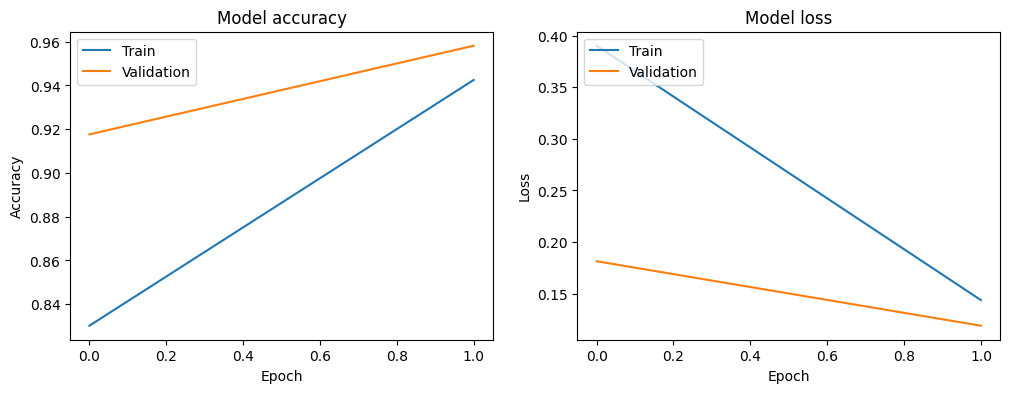

48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 166ms/step
              precision    recall  f1-score   support

       tumor       0.96      0.96      0.96       790
    no_tumor       0.96      0.96      0.96       715

    accuracy                           0.96      1505
   macro avg       0.96      0.96      0.96      1505
weighted avg       0.96      0.96      0.96      1505

[[758  32]
 [ 31 684]]


In [6]:
# Function to load and preprocess images
def load_and_preprocess_images(image_dir, labels, img_size=(224, 224)):
    images = []
    processed_labels = []
    for label in labels:
        label_dir = os.path.join(image_dir, label)
        for image_file in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_file)
            image = cv2.imread(image_path)
            if image is not None:
                image = cv2.resize(image, img_size)
                images.append(image)
                processed_labels.append(labels[label])
    images = np.array(images) / 255.0
    processed_labels = to_categorical(np.array(processed_labels))
    return images, processed_labels

# Example usage
image_dir = 'combined/train'
labels = {'tumor': 0, 'no_tumor': 1, 'aug_no_tumor': 1}
images, processed_labels = load_and_preprocess_images(image_dir, labels)

# Convert processed_labels back to integer labels for class weight computation
integer_labels = np.argmax(processed_labels, axis=1)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, processed_labels, test_size=0.2, random_state=42)

# Calculate class weights using the original integer labels
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(integer_labels), y=integer_labels)

# Convert class_weights to a dictionary
class_weights_dict = dict(enumerate(class_weights))

# Function to create the CNN model
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Model parameters
input_shape = (224, 224, 3)
num_classes = 2

# Create and summarize the model
model = create_cnn_model(input_shape, num_classes)
model.summary()

# Train the model with class weights
history = model.fit(X_train, y_train, epochs=2, validation_data=(X_val, y_val), batch_size=32, class_weight=class_weights_dict)

# Plotting the training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Evaluate the model
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=['tumor', 'no_tumor']))
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print(conf_matrix)


In [10]:
print(class_weights_dict)

{0: 0.9713326446280992, 1: 1.0304109589041095}


## Preprocessed

In [1]:
import os
import cv2
import numpy as np
from concurrent.futures import ThreadPoolExecutor
from tensorflow.keras.utils import to_categorical
import pickle

# Function to load and preprocess a single image
def load_and_preprocess_single_image(image_path, img_size):
    image = cv2.imread(image_path)
    if image is not None:
        image = cv2.resize(image, img_size)
        return image
    return None

# Function to load and preprocess images with multithreading
def load_and_preprocess_images(image_dir, labels, img_size=(224, 224)):
    images = []
    processed_labels = []
    with ThreadPoolExecutor() as executor:
        futures = []
        for label in labels:
            label_dir = os.path.join(image_dir, label)
            for image_file in os.listdir(label_dir):
                image_path = os.path.join(label_dir, image_file)
                futures.append(executor.submit(load_and_preprocess_single_image, image_path, img_size))
        
        for future, label in zip(futures, [labels[label] for label in labels for _ in os.listdir(os.path.join(image_dir, label))]):
            image = future.result()
            if image is not None:
                images.append(image)
                processed_labels.append(label)

    images = np.array(images) / 255.0
    processed_labels = to_categorical(np.array(processed_labels))
    return images, processed_labels

# Example usage
image_dir = 'combined/train'
labels = {'tumor': 0, 'no_tumor': 1, 'aug_no_tumor': 1}
images, processed_labels = load_and_preprocess_images(image_dir, labels)

# Save preprocessed data to disk
with open('preprocessed_images.pkl', 'wb') as f:
    pickle.dump(images, f)
with open('preprocessed_labels.pkl', 'wb') as f:
    pickle.dump(processed_labels, f)


In [2]:
# Load preprocessed data
with open('preprocessed_images.pkl', 'rb') as f:
    images = pickle.load(f)
with open('preprocessed_labels.pkl', 'rb') as f:
    processed_labels = pickle.load(f)

# Convert processed_labels back to integer labels for class weight computation
integer_labels = np.argmax(processed_labels, axis=1)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, processed_labels, test_size=0.2, random_state=42)

# Calculate class weights using the original integer labels
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(integer_labels), y=integer_labels)

# Convert class_weights to a dictionary
class_weights_dict = dict(enumerate(class_weights))

print(class_weights_dict)

# Function to create the CNN model
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Model parameters
input_shape = (224, 224, 3)
num_classes = 2

# Create and summarize the model
model = create_cnn_model(input_shape, num_classes)
model.summary()

# Train the model with class weights
history = model.fit(X_train, y_train, epochs=2, validation_data=(X_val, y_val), batch_size=32, class_weight=class_weights_dict)

# Save the model
model.save('brain_tumor_cnn_model.h5')

# Plotting the training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Evaluate the model
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=['tumor', 'no_tumor']))
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print(conf_matrix)


{0: 0.9713326446280992, 1: 1.0304109589041095}


/Users/kayen/.pyenv/versions/3.12.3/envs/myenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,245,186 (84.86 MB)

 Trainable params: 22,245,186 (84.86 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 156s 819ms/step - accuracy: 0.7218 - loss: 0.6860 - val_accuracy: 0.9156 - val_loss: 0.2373
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 145s 766ms/step - accuracy: 0.9202 - loss: 0.2023 - val_accuracy: 0.9236 - val_loss: 0.2531
Epoch 3/10
121/189 ━━━━━━━━━━━━━━━━━━━━ 44s 650ms/step - accuracy: 0.9289 - loss: 0.2083

KeyboardInterrupt: 

## Baseline Model

In [4]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

def load_and_preprocess_images(image_dir, labels, img_size=(224, 224)):
    images = []
    processed_labels = []
    for label in labels:
        label_dir = os.path.join(image_dir, label)
        for image_file in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_file)
            image = cv2.imread(image_path)
            if image is not None:
                image = cv2.resize(image, img_size)
                images.append(image)
                processed_labels.append(labels[label])
    images = np.array(images) / 255.0
    processed_labels = to_categorical(np.array(processed_labels))
    return images, processed_labels

# Example usage
image_dir = 'combined/train'
labels = {'tumor': 0, 'no_tumor': 1}
images, processed_labels = load_and_preprocess_images(image_dir, labels)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, processed_labels, test_size=0.2, random_state=42)

def create_baseline_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(16, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

input_shape = (224, 224, 3)
num_classes = 2
baseline_model = create_baseline_cnn_model(input_shape, num_classes)
baseline_model.summary()

# Train the baseline model
baseline_history = baseline_model.fit(X_train, y_train, epochs=2, validation_data=(X_val, y_val), batch_size=32)



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 93312)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,944,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,949,410 (45.58 MB)

 Trainable params: 11,949,410 (45.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
139/139 ━━━━━━━━━━━━━━━━━━━━ 37s 262ms/step - accuracy: 0.7660 - loss: 0.7008 - val_accuracy: 0.9267 - val_loss: 0.2131
Epoch 2/2
139/139 ━━━━━━━━━━━━━━━━━━━━ 32s 226ms/step - accuracy: 0.9333 - loss: 0.1771 - val_accuracy: 0.9520 - val_loss: 0.1640


## Pretrained

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    25,691,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         2,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,407,874 (154.14 MB)

 Trainable params: 25,693,186 (98.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/3
189/189 ━━━━━━━━━━━━━━━━━━━━ 853s 5s/step - accuracy: 0.5131 - loss: 7.5813 - val_accuracy: 0.5249 - val_loss: 7.6574
Epoch 2/3
189/189 ━━━━━━━━━━━━━━━━━━━━ 837s 4s/step - accuracy: 0.5135 - loss: 7.8413 - val_accuracy: 0.5249 - val_loss: 7.6574
Epoch 3/3
189/189 ━━━━━━━━━━━━━━━━━━━━ 1181s 6s/step - accuracy: 0.5045 - loss: 7.9871 - val_accuracy: 0.5249 - val_loss: 7.6574


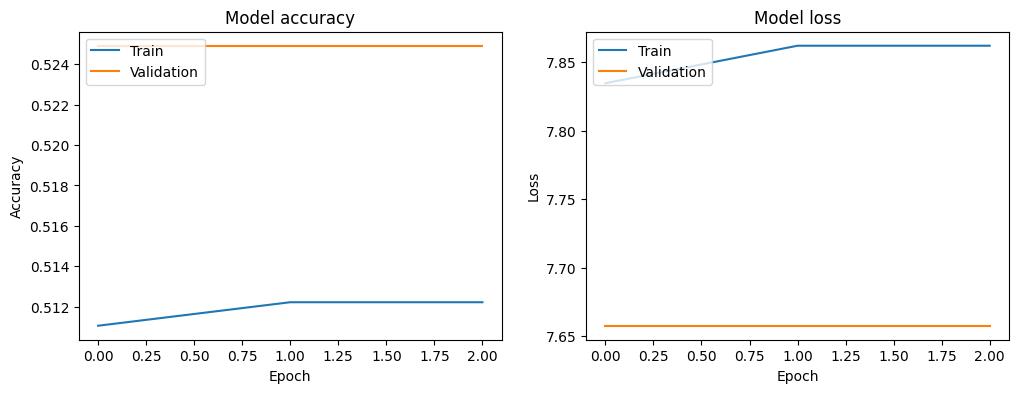

48/48 ━━━━━━━━━━━━━━━━━━━━ 166s 3s/step
              precision    recall  f1-score   support

       tumor       0.52      1.00      0.69       790
    no_tumor       0.00      0.00      0.00       715

    accuracy                           0.52      1505
   macro avg       0.26      0.50      0.34      1505
weighted avg       0.28      0.52      0.36      1505

[[790   0]
 [715   0]]


/Users/kayen/.pyenv/versions/3.12.3/envs/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kayen/.pyenv/versions/3.12.3/envs/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/kayen/.pyenv/versions/3.12.3/envs/myenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Enable mixed precision training
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

# Function to load and preprocess images
def load_and_preprocess_images(image_dir, labels, img_size=(224, 224)):
    images = []
    processed_labels = []
    for label in labels:
        label_dir = os.path.join(image_dir, label)
        for image_file in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_file)
            image = cv2.imread(image_path)
            if image is not None:
                image = cv2.resize(image, img_size)
                images.append(image)
                processed_labels.append(labels[label])
    images = np.array(images) / 255.0
    processed_labels = to_categorical(np.array(processed_labels))
    return images, processed_labels

# Example usage
image_dir = 'combined/train'
labels = {'tumor': 0, 'no_tumor': 1, 'aug_no_tumor': 1}
images, processed_labels = load_and_preprocess_images(image_dir, labels)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, processed_labels, test_size=0.2, random_state=42)

# Function to create the VGG16-based model
def create_vgg_model(input_shape, num_classes):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = Flatten()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Model parameters
input_shape = (224, 224, 3)
num_classes = 2  # Since there are two classes: tumor and no_tumor

# Create and summarize the VGG16-based model
model = create_vgg_model(input_shape, num_classes)
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_val, y_val), batch_size=32)

# Plotting the training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Evaluate the model
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=['tumor', 'no_tumor']))
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print(conf_matrix)


